In [1]:
"""
1. install mysql workbench.(storage container where we can store data in tabular format)
2. Establish the connection b/w jupyter notebook and mysql workbench.
3. for this connection we have to install a driver(python package) s/w which acts as a bridge.
4. PYPI is a repository where we can find all the python packages.
5. install driver using pip install mysql-connector-python.(! -> install using jupyter notebook)
-> pip : repository | mysql-connector-python : package
"""

'\n1. install mysql workbench.(storage container where we can store data in tabular format)\n2. Establish the connection b/w jupyter notebook and mysql workbench.\n3. for this connection we have to install a driver(python package) s/w which acts as a bridge.\n4. PYPI is a repository where we can find all the python packages.\n5. install driver using pip install mysql-connector-python.(! -> install using jupyter notebook)\n-> pip : repository | mysql-connector-python : package\n'

In [2]:
!pip install mysql-connector-python

In [ ]:
"""
1. driver installed successfully so, now we can connect to the DB.
-> flow diagram:
    Python file <-----> driver <-----> DB(MySQL)
2. Database - data storing system.
3. import db connector from installed packages.
"""

In [4]:
import mysql.connector as con

In [6]:
con.connect(
    host='localhost',
    user='root',
    passwd='',
)

ProgrammingError: 1045 (28000): Access denied for user 'root'@'localhost' (using password: NO)

In [9]:
my_db_con = con.connect(
    host='localhost',
    user='root',
    passwd='Jck7@522001'
)

In [10]:
# now we have established the connection b/w notebook and sql workbench.

In [11]:
my_db_con  # mySql connection object.

In [12]:
my_db_cur = my_db_con.cursor()  # pointer to the DB's

In [20]:
my_db_cur.execute(
    # db operation
    "show databases;"
)

In [21]:
my_db_cur.fetchall()
# now this will show the list of tuple of all the DB's

[('information_schema',), ('mysql',), ('performance_schema',), ('sys',)]

In [ ]:
"""
steps to follow
1. import db connector.
2. connect to database and store the connection object.
3. using connection object create a pointer/cursor.
4. using pointer execute the SQL query.
5. fetch/view the results of the query executed.
"""
"""
Hierarchy :
    DataBase -> Tables -> (
                    Columns, => fields/attributes with their data type.
                    Rows => records/data with their value.
                )

    -> Tables(mysql - structured data) => Schema.
"""

In [2]:
# create our own database.
# query = CREATE DATABASE IF NOT EXISTS <database_name>;

import mysql.connector as con

# connection to db and store the connection object.
db_conn = con.connect(
    host='localhost',
    user='root',
    passwd='Jck7@522001',
)

# db pointer and query execution
db_cur = db_conn.cursor()
db_cur.execute(
    "CREATE DATABASE IF NOT EXISTS Student;"  # Student - database
)


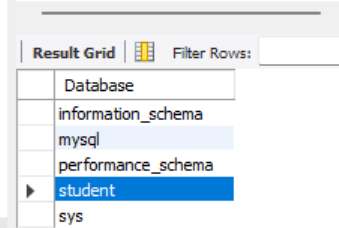

DataBase GOT CREATED
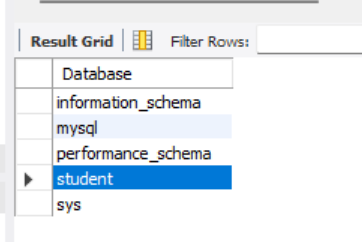
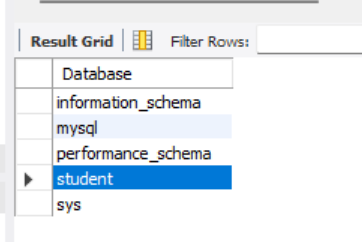

In [23]:
# create table/schema inside this database
# query -
# CREATE TABLE IF NOT EXISTS database_name.table_name (
#     field1 datatype ,
#     field2 datatype ,
#     field3 datatype ,
#     ...
# );

# field - column_name (student_id , first_name , last_name , reg_id , class_name)
# datatype - INT(max_length) | VARCHAR(max_length)

db_cur.execute(
    # Student - DBName | ineuron - tableName
    "CREATE TABLE IF NOT EXISTS Student.ineuron(std_id INT(10), first_name VARCHAR(10) , last_name VARCHAR(10) , reg_id INT(15) , class_name VARCHAR(10))"
)

In [ ]:
# see all the tables inside a DB
# query -
# USE DB_NAME;
# SHOW TABLES;

In [25]:
db_cur.execute("USE STUDENT")

In [26]:
db_cur.execute("SHOW TABLES")

In [27]:
db_cur.fetchall()

[('ineuron',)]

In [ ]:
# see all the records inside the table.
# query -
# SELECT * FROM DATABASE_NAME.TABLE_NAME

In [30]:
db_cur.execute("SELECT * FROM STUDENT.ineuron")

In [31]:
db_cur.fetchall()

[]

In [ ]:
# insert records/data into the table
# query -
# INSERT INTO database_name.table_name (column1, column2, ...)
# VALUES (valueA1, valueA2, ...),
#        (valueB1, valueB2, ...),
#        (valueC1, valueC2, ...)
#        ....
#        ;

In [32]:
# AS of now inserting 2 records
insert_query = "INSERT INTO STUDENT.ineuron(std_id , first_name , last_name , reg_id , class_name) VALUES (1 , 'chandra' , 'jami' , 98765 , 'class-A') , (2 , 'kiran' , 'jami' , 12345 , 'class-A');"

db_cur.execute(insert_query)

In [33]:
# after performing operations on the table we have to commit using connection, else we cant see the response.
db_conn.commit()

In [34]:
# note - without commit we can't see the results.

In [35]:
db_cur.execute("SELECT * FROM STUDENT.ineuron")

In [36]:
db_cur.fetchall()

[(1, 'chandra', 'jami', 98765, 'class-A'),
 (2, 'kiran', 'jami', 12345, 'class-A')]

In [ ]:
# row -> record -> tuple

In [4]:
insert_query = "INSERT INTO STUDENT.ineuron(std_id , first_name , last_name , reg_id , class_name) VALUES (1 , 'chandra' , 'jami' , 98765 , 'FSDS-A') , (2 , 'kiran' , 'jami' , 12345 , 'FSDS-B');"

db_cur.execute(insert_query)

In [5]:
db_conn.commit()

In [6]:
db_cur.execute("SELECT * FROM STUDENT.ineuron")
db_cur.fetchall()

[(1, 'chandra', 'jami', 98765, 'class-A'),
 (2, 'kiran', 'jami', 12345, 'class-A'),
 (1, 'chandra', 'jami', 98765, 'FSDS-A'),
 (2, 'kiran', 'jami', 12345, 'FSDS-B')]

In [ ]:
# we now bulk upload data from bulk_upload_glass.data to db.
# create a new table ,as data contains 11 fields so create 11 columns w.r.t data types.

In [3]:
import mysql.connector as conn

In [4]:
new_conn1 = conn.connect(
    host='localhost',
    user='root',
    passwd='Jck7@522001',
)

new_cur1 = new_conn1.cursor()

In [27]:
# FLOAT(MAX_LENGTH , MAX LENGTH AFTER DECIMAL POINT)
# query = "USE STUDENT;"
query = "CREATE TABLE IF NOT EXISTS STUDENT.GLASS_DATA(COL1 INT(5) , COL2 FLOAT(5,3) , COL3 FLOAT(5,3) , COL4 FLOAT(5,3) , COL5 FLOAT(5,3) , COL6 FLOAT(5,3) , COL7 FLOAT(5,3) , COL8 FLOAT(5,3) , COL9 FLOAT(5,3) , COL10 FLOAT(5,3) , COL11 INT(5) )"

In [28]:
new_cur1.execute(query)

In [29]:
new_cur1.execute("USE STUDENT;")
new_cur1.execute("SHOW TABLES;")

In [30]:
new_cur1.fetchall()

[('glass_data',), ('ineuron',)]

In [10]:
# table created with 11 columns and w.r.t data types.

In [36]:
"""
read the file and upload to the DB.
"""

glass_file = open(
    file="bulk_upload_glass.data",
    mode="r"
)

In [37]:
glass_data = glass_file.read().strip().split("\n")
glass_file.close()

In [38]:
print(glass_data)

['1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1', '2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1', '3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1', '4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1', '5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1', '6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1', '7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1', '8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1', '9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1', '10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1', '11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.00,0.24,1', '12,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0.00,0.00,1', '13,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.00,0.24,1', '14,1.51748,12.86,3.56,1.27,73.21,0.54,8.38,0.00,0.17,1', '15,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.00,1', '16,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.00,1', '17,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.00,1', '18,1.52196,14.36,3.85

In [39]:
for i in glass_data:
    # i:str
    l = i.split(",")
    data = []

    for j in range(len(l)):
        if j == 0 or j == len(l) - 1:
            try:
                data.append(int(l[j]))
            except Exception as e:
                print("Exception",l)
        else :
            data.append(float(l[j]))
    # print(data)

    # insert this data_list data into the db.
    query = "INSERT INTO STUDENT.GLASS_DATA(COL1 , COL2 , COL3 , COL4 , COL5 , COL6 , COL7 , COL8 , COL9 , COL10 , COL11) VALUES (%s , %s , %s , %s , %s , %s , %s , %s , %s , %s , %s)"

    new_cur1.execute(query , tuple(data))

new_conn1.commit()


In [40]:
new_cur1.execute("SELECT * FROM STUDENT.GLASS_DATA")
new_cur1.fetchall()

[(1, 1.521, 13.64, 4.49, 1.1, 71.78, 0.06, 8.75, 0.0, 0.0, 1),
 (2, 1.518, 13.89, 3.6, 1.36, 72.73, 0.48, 7.83, 0.0, 0.0, 1),
 (3, 1.516, 13.53, 3.55, 1.54, 72.99, 0.39, 7.78, 0.0, 0.0, 1),
 (4, 1.518, 13.21, 3.69, 1.29, 72.61, 0.57, 8.22, 0.0, 0.0, 1),
 (5, 1.517, 13.27, 3.62, 1.24, 73.08, 0.55, 8.07, 0.0, 0.0, 1),
 (6, 1.516, 12.79, 3.61, 1.62, 72.97, 0.64, 8.07, 0.0, 0.26, 1),
 (7, 1.517, 13.3, 3.6, 1.14, 73.09, 0.58, 8.17, 0.0, 0.0, 1),
 (8, 1.518, 13.15, 3.61, 1.05, 73.24, 0.57, 8.24, 0.0, 0.0, 1),
 (9, 1.519, 14.04, 3.58, 1.37, 72.08, 0.56, 8.3, 0.0, 0.0, 1),
 (10, 1.518, 13.0, 3.6, 1.36, 72.99, 0.57, 8.4, 0.0, 0.11, 1),
 (11, 1.516, 12.72, 3.46, 1.56, 73.2, 0.67, 8.09, 0.0, 0.24, 1),
 (12, 1.518, 12.8, 3.66, 1.27, 73.01, 0.6, 8.56, 0.0, 0.0, 1),
 (13, 1.516, 12.88, 3.43, 1.4, 73.28, 0.69, 8.05, 0.0, 0.24, 1),
 (14, 1.517, 12.86, 3.56, 1.27, 73.21, 0.54, 8.38, 0.0, 0.17, 1),
 (15, 1.518, 12.61, 3.59, 1.31, 73.29, 0.58, 8.5, 0.0, 0.0, 1),
 (16, 1.518, 12.81, 3.54, 1.23, 73.24, 0.5

In [ ]:
"""
using pandas also we can perform sql operations.
"""

In [5]:
import pandas as pd

In [6]:
pd.read_sql(
    "SELECT * FROM STUDENT.GLASS_DATA",
    con=new_conn1,
)

C:\Users\chand\AppData\Local\Temp\ipykernel_8820\1737072617.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(


,COL1,COL2,COL3,COL4,COL5,COL6,COL7,COL8,COL9,COL10,COL11
0,1,1.521,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.518,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.516,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.518,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.517,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.516,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.517,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.521,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.517,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7
